In [3]:
from visualization_tools import *
import pandas as pd
import json




In [4]:
run_number = range(1, 33)
#task = "tensorflow"
folder = "C:\\Users\\lamec\\WORK\\evolutionary_optimization_dumps\\dumps"
#folder = "C:\\Users\\lamec\\WORK\\evolutionary_optimization"
#folder = "/Users/soren/Work/evolutionary_optimization"
# Create the DataFrame with ified columns and data types
df = pd.DataFrame({
    'Experiment name': pd.Series(dtype='string'),
    'Run number': pd.Series(dtype='string'),
    'Individual number': pd.Series(dtype='int64'),
    'Phenotype': pd.Series(dtype='string'),
    'Smart Phenotype': pd.Series(dtype='string'),
    'Fitness': pd.Series(dtype='float64'),
	'Duration': pd.Series(dtype='float64'),
	'Source': pd.Series(dtype='string')
})


df_full_eval = load_results(folder)
df = df_full_eval



C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_0.json 0
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_1.json 1
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_10.json 10
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_11.json 11
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_12.json 12
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_13.json 13
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_14.json 14
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_15.json 15
C:\Users\lamec\WORK\evolutionary_optimization_dumps\dumps\evolutionary_optimization\run_1\iteration_16.json 16
C:\Us

In [5]:
df

,Experiment name,Run number,Individual number,Generation,Phenotype,Smart Phenotype,Fitness,Duration,Source
0,evolutionary_optimization,run_1,60,0,"alpha_func, beta_func, sigma_func, grad_func =...","add(negative(grad), grad)",-0.116891,6.879185,evaluation
1,evolutionary_optimization,run_1,2,0,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(grad, pow(constant(1.0), grad))",-0.100000,8.505805,evaluation
2,evolutionary_optimization,run_1,9,0,"alpha_func, beta_func, sigma_func, grad_func =...","add(grad, sigma)",-0.100000,7.713348,evaluation
3,evolutionary_optimization,run_1,12,0,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(add(beta, grad), constant(9.95290886e...",-0.100000,6.842240,evaluation
4,evolutionary_optimization,run_1,15,0,"alpha_func, beta_func, sigma_func, grad_func =...","add(grad, grad)",-0.100000,7.581867,evaluation
...,...,...,...,...,...,...,...,...,...
299995,evolutionary_optimization,run_9,6051,99,"alpha_func, beta_func, sigma_func, grad_func =...","divide_no_nan(constant(6.79983174e-05), add(co...",0.000000,0.000027,invalid detection
299996,evolutionary_optimization,run_9,6052,99,"alpha_func, beta_func, sigma_func, grad_func =...","divide_no_nan(sigma, add(constant(7.88036666e-...",0.000000,0.000024,invalid detection
299997,evolutionary_optimization,run_9,6071,99,"alpha_func, beta_func, sigma_func, grad_func =...","divide_no_nan(alpha, add(beta, alpha))",0.000000,0.000022,invalid detection
299998,evolutionary_optimization,run_9,6072,99,"alpha_func, beta_func, sigma_func, grad_func =...","divide_no_nan(constant(6.79983174e-05), add(sq...",0.000000,0.000022,invalid detection


In [6]:
 # Assuming you already have the DataFrame, let's call it 'df'

# Group by 'Experiment name' and 'Run number', then count the entries in each group
individual_counts = df.groupby(['Experiment name', 'Run number'])['Individual number'].nunique().reset_index(name='Unique Individual Count')
df['Fitness'] = df['Fitness'] * -1
individual_counts
df.head(5)

,Experiment name,Run number,Individual number,Generation,Phenotype,Smart Phenotype,Fitness,Duration,Source
0,evolutionary_optimization,run_1,60,0,"alpha_func, beta_func, sigma_func, grad_func =...","add(negative(grad), grad)",0.116891,6.879185,evaluation
1,evolutionary_optimization,run_1,2,0,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(grad, pow(constant(1.0), grad))",0.100000,8.505805,evaluation
2,evolutionary_optimization,run_1,9,0,"alpha_func, beta_func, sigma_func, grad_func =...","add(grad, sigma)",0.100000,7.713348,evaluation
3,evolutionary_optimization,run_1,12,0,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(add(beta, grad), constant(9.95290886e...",0.100000,6.842240,evaluation
4,evolutionary_optimization,run_1,15,0,"alpha_func, beta_func, sigma_func, grad_func =...","add(grad, grad)",0.100000,7.581867,evaluation


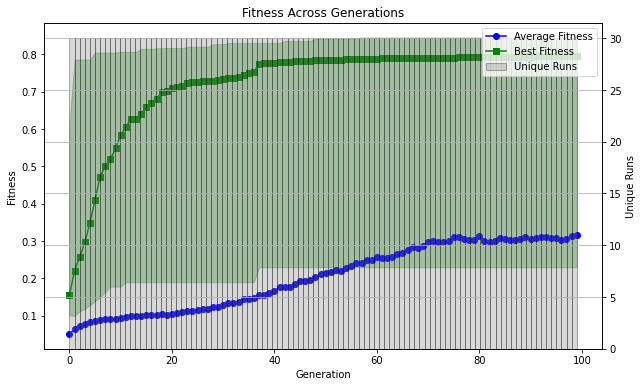

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'Generation', 'Fitness', 'Experiment name', and 'Run number'

# Step 1: Group by 'Experiment name', 'Run number', and 'Generation', and compute the mean and max fitness for each group
fitness_data = df.groupby(['Experiment name', 'Run number', 'Generation'])['Fitness'].agg(['mean', 'max']).reset_index()

# Step 2: Group by 'Generation' and compute the overall mean and max fitness for each generation
generation_stats = fitness_data.groupby('Generation').agg({'mean': 'mean', 'max': 'mean', 'Run number': 'nunique'}).reset_index()
generation_stats.rename(columns={'Run number': 'Unique Runs'}, inplace=True)

# Step 3: Calculate highest and lowest fitness across all runs per generation from the max fitness data
highest_fitness = fitness_data.groupby('Generation')['max'].max().reset_index()
lowest_fitness = fitness_data.groupby('Generation')['max'].min().reset_index()

# Step 4: Plot the average fitness, best fitness, and the shadow for the range between highest and lowest fitness
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average fitness on the first y-axis
ax1.plot(generation_stats['Generation'], generation_stats['mean'], marker='o', linestyle='-', color='b', label='Average Fitness')
ax1.plot(generation_stats['Generation'], generation_stats['max'], marker='s', linestyle='-', color='g', label='Best Fitness')
ax1.fill_between(generation_stats['Generation'], lowest_fitness['max'], highest_fitness['max'], alpha=0.3, color='g')

ax1.set_xlabel('Generation')
ax1.set_ylabel('Fitness')
ax1.set_title('Fitness Across Generations')

# Create a secondary y-axis for the histogram
ax2 = ax1.twinx()

# Plot transparent histogram for unique runs on the secondary y-axis
ax2.hist(generation_stats['Generation'], bins=len(generation_stats), alpha=0.3, color='gray', edgecolor='black',
         weights=generation_stats['Unique Runs'], label='Unique Runs')
ax2.set_ylabel('Unique Runs')

# Combine the legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

plt.grid(True)
plt.show()


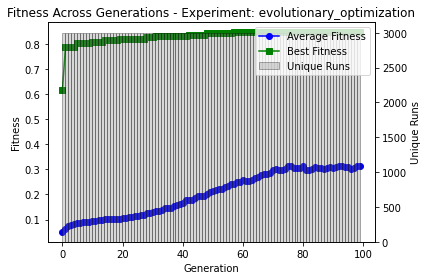

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib.rcParams["pdf.fonttype"] = 42
#matplotlib.rcParams["ps.fonttype"] = 42
#plt.rcParams["figure.figsize"] = [20, 100]

# Assuming you have a DataFrame 'df' with columns 'Generation', 'Fitness', 'Experiment name', and 'Run number'

# Step 1: Group by 'Experiment name', 'Run number', and 'Generation', and compute the mean and max fitness for each group
#fitness_data = df.groupby(['Experiment name', 'Run number', 'Generation'])['Fitness'].agg(['mean', 'max']).reset_index()

# Step 2: Group by 'Generation' and compute the overall mean and max fitness for each generation
#generation_stats = fitness_data.groupby(['Experiment name', 'Generation']).agg({'mean': 'mean', 'max': 'mean', 'Run number': 'nunique'}).reset_index()
#generation_stats.rename(columns={'Run number': 'Unique Runs'}, inplace=True)

# Step 3: Calculate highest and lowest fitness across all runs per generation from the max fitness data
#highest_fitness = fitness_data.groupby(['Experiment name', 'Generation'])['max'].max().reset_index()
#lowest_fitness = fitness_data.groupby(['Experiment name', 'Generation'])['max'].min().reset_index()

# Step 4: Create subplots for each experiment with a shared y-axis
experiment_names = df['Experiment name'].unique()
if len(experiment_names) < 1:
    fig, axs = plt.subplots(len(experiment_names), figsize=(20, 20), sharey=True)  # sharey=True ensures shared y-axis

    for i, experiment_name in enumerate(experiment_names):
        df_i = df[df['Experiment name'] == experiment_name]
        ax = axs[i]

        mean_fitness_generation = df_i.groupby(['Generation']).agg({'Fitness': 'mean'}).reset_index()
        max_fitness_generation = df_i.groupby(['Generation']).agg({'Fitness': 'max'}).reset_index()
        count_runs_generation = df_i.groupby(['Generation']).agg({'Run number': 'count'}).reset_index()
        # Plot average fitness on the first y-axis
        ax.plot(mean_fitness_generation['Generation'], mean_fitness_generation['Fitness'], marker='o', linestyle='-', color='b', label='Average Fitness')
        ax.plot(max_fitness_generation['Generation'], max_fitness_generation['Fitness'], marker='s', linestyle='-', color='g', label='Best Fitness')
        #ax.fill_between(experiment_data['Generation'], experiment_lowest['max'], experiment_highest['max'], alpha=0.3, color='g')
        
        ax.set_xlabel('Generation')
        ax.set_ylabel('Fitness')
        ax.set_title(f'Fitness Across Generations - Experiment: {experiment_name}')
        
        # Create a secondary y-axis for the histogram
        ax2 = ax.twinx()
        
        # Plot transparent histogram for unique runs on the secondary y-axis
        ax2.hist(count_runs_generation['Generation'], bins=len(count_runs_generation), alpha=0.3, color='gray', edgecolor='black',
                weights=count_runs_generation['Run number'], label='Unique Runs')
        ax2.set_ylabel('Unique Runs')
        
        # Combine the legends from both y-axes
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2)

    plt.tight_layout()
    plt.show()
else:
    experiment_name = experiment_names[0]
    df_i = df[df['Experiment name'] == experiment_name]
    ax = plt.gca()

    mean_fitness_generation = df_i.groupby(['Generation']).agg({'Fitness': 'mean'}).reset_index()
    max_fitness_generation = df_i.groupby(['Generation']).agg({'Fitness': 'max'}).reset_index()
    count_runs_generation = df_i.groupby(['Generation']).agg({'Run number': 'count'}).reset_index()
    # Plot average fitness on the first y-axis
    ax.plot(mean_fitness_generation['Generation'], mean_fitness_generation['Fitness'], marker='o', linestyle='-', color='b', label='Average Fitness')
    ax.plot(max_fitness_generation['Generation'], max_fitness_generation['Fitness'], marker='s', linestyle='-', color='g', label='Best Fitness')
    #ax.fill_between(experiment_data['Generation'], experiment_lowest['max'], experiment_highest['max'], alpha=0.3, color='g')
    
    ax.set_xlabel('Generation')
    ax.set_ylabel('Fitness')
    ax.set_title(f'Fitness Across Generations - Experiment: {experiment_name}')
    
    # Create a secondary y-axis for the histogram
    ax2 = ax.twinx()
    
    # Plot transparent histogram for unique runs on the secondary y-axis
    ax2.hist(count_runs_generation['Generation'], bins=len(count_runs_generation), alpha=0.3, color='gray', edgecolor='black',
            weights=count_runs_generation['Run number'], label='Unique Runs')
    ax2.set_ylabel('Unique Runs')
    
    # Combine the legends from both y-axes
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2)

    plt.tight_layout()
    plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df_mean_fitness = df.groupby(['Experiment name', 'Run number']).agg({'Generation': 'max'}).reset_index()

last_gen_stats = {'Experiment name': [], "Fitness": [], "Generation": []}
for i, data in df_mean_fitness.iterrows():
    #print(data)
    last_gen_stats['Experiment name'].append(data['Experiment name'])
    last_gen_stats['Fitness'].append(np.mean(df[(df['Generation'] == data['Generation']) & (df['Experiment name'] == data['Experiment name']) & (df['Run number'] == data['Run number'])]['Fitness']))
    last_gen_stats['Generation'].append(data['Generation'])

df_mean_fitness = pd.DataFrame(last_gen_stats)

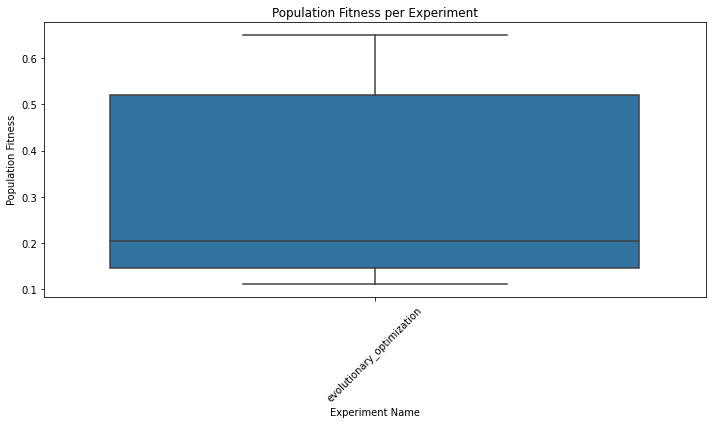

Experiment: evolutionary_optimization 0.3148846601448953


In [10]:

# Step 1: Create a box plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Use seaborn to create a box plot, specifying 'x' as 'Experiment name' and 'y' as 'Fitness'
sns.boxplot(data=df_mean_fitness, x='Experiment name', y='Fitness')

# Customize the plot
plt.title('Population Fitness per Experiment')
plt.xlabel('Experiment Name')
plt.ylabel('Population Fitness')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
#plt.tight_layout()
#plt.show()

# Set custom y-axis limits (adjust these values as needed)
#plt.ylim(0.8, 0.93)  # Example: set the y-axis limits from 0 to 100

# Show the plot
plt.tight_layout()
plt.show()
for i, experiment_name in enumerate(experiment_names):
    df_i = df_mean_fitness[df_mean_fitness['Experiment name'] == experiment_name]
    print(f"Experiment: {experiment_name} {np.mean(df_i['Fitness'])}")


             Experiment name Run number   Fitness
0  evolutionary_optimization      run_1  0.821218
1  evolutionary_optimization     run_10  0.827836
2  evolutionary_optimization     run_11  0.830127
3  evolutionary_optimization     run_12  0.822982
4  evolutionary_optimization     run_13  0.832727


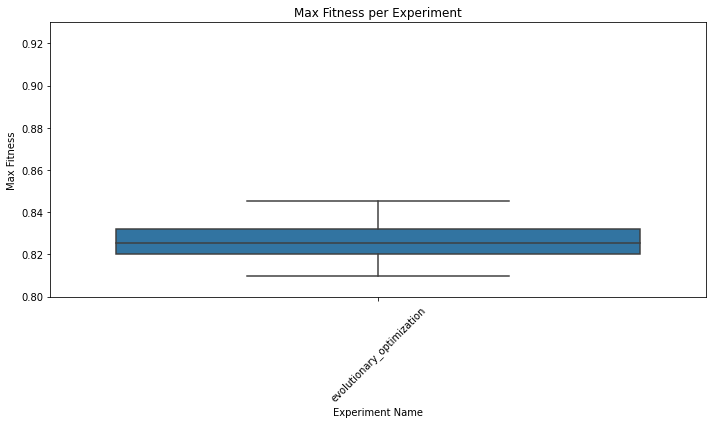

Experiment: evolutionary_optimization Mean: 0.795949092010657 Max: 0.8453999757766724


In [11]:


# Assuming you have a DataFrame 'df' with columns 'Experiment name', 'Run number', and 'Fitness'
df_max_fitness = df.groupby(['Experiment name', 'Run number']).agg({'Fitness': 'max'}).reset_index()
print(df_max_fitness.head(5))
# Step 1: Create a box plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Use seaborn to create a box plot, specifying 'x' as 'Experiment name' and 'y' as 'Fitness'
sns.boxplot(data=df_max_fitness, x='Experiment name', y='Fitness')

# Customize the plot
plt.title('Max Fitness per Experiment')
plt.xlabel('Experiment Name')
plt.ylabel('Max Fitness')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
#plt.tight_layout()
#plt.show()

# Set custom y-axis limits (adjust these values as needed)
plt.ylim(0.8, 0.93)  # Example: set the y-axis limits from 0 to 100

# Show the plot
plt.tight_layout()
plt.show()
for i, experiment_name in enumerate(experiment_names):
    df_i = df_max_fitness[df_max_fitness['Experiment name'] == experiment_name]
    print(f"Experiment: {experiment_name} Mean: {np.mean(df_i['Fitness'])} Max: {np.max(df_i['Fitness'])}")


             Experiment name Run number  Smart Phenotype
0  evolutionary_optimization      run_1              153
1  evolutionary_optimization     run_10              382
2  evolutionary_optimization     run_11              173
3  evolutionary_optimization     run_12              208
4  evolutionary_optimization     run_13             1215


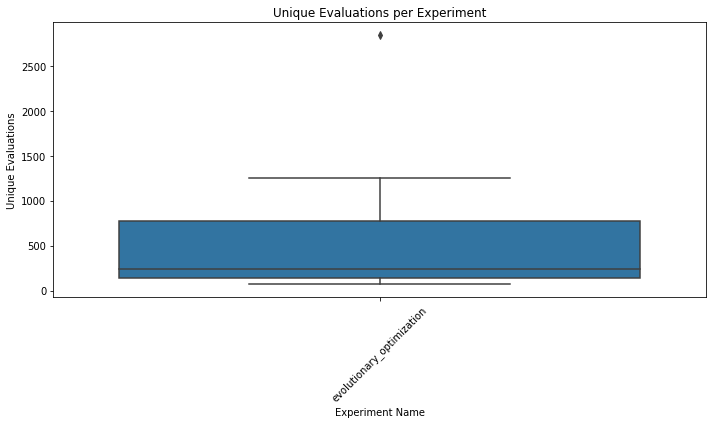

In [12]:
# Assuming you have a DataFrame 'df' with columns 'Experiment name', 'Run number', and 'Fitness'
df_unique_evals = df[df['Fitness'] >= 0.11].groupby(['Experiment name', 'Run number']).agg({'Smart Phenotype': 'nunique'}).reset_index()
print(df_unique_evals.head(5))
# Step 1: Create a box plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Use seaborn to create a box plot, specifying 'x' as 'Experiment name' and 'y' as 'Fitness'
sns.boxplot(data=df_unique_evals, x='Experiment name', y='Smart Phenotype')

# Customize the plot
plt.title('Unique Evaluations per Experiment')
plt.xlabel('Experiment Name')
plt.ylabel('Unique Evaluations')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
#plt.tight_layout()
#plt.show()

# Set custom y-axis limits (adjust these values as needed)
#plt.ylim(0.8, 0.93)  # Example: set the y-axis limits from 0 to 100

# Show the plot
plt.tight_layout()
plt.show()
#for i, experiment_name in enumerate(experiment_names):
    #df_i = df_max_fitness[df_max_fitness['Experiment name'] == experiment_name]
    #print(f"{experiment_name} {np.mean(df_i['Fitness'])}")


             Experiment name Run number  Smart Phenotype
0  evolutionary_optimization      run_1               40
1  evolutionary_optimization     run_10               79
2  evolutionary_optimization     run_11               92
3  evolutionary_optimization     run_12               81
4  evolutionary_optimization     run_13              248


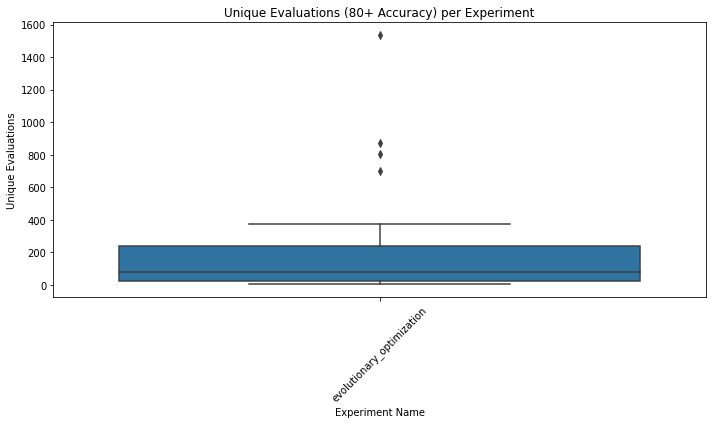

evolutionary_optimization 221.3793103448276


In [13]:
# Assuming you have a DataFrame 'df' with columns 'Experiment name', 'Run number', and 'Fitness'
df_unique_evals = df[df['Fitness'] >= 0.5].groupby(['Experiment name', 'Run number']).agg({'Smart Phenotype': 'nunique'}).reset_index()
print(df_unique_evals.head(5))
# Step 1: Create a box plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Use seaborn to create a box plot, specifying 'x' as 'Experiment name' and 'y' as 'Fitness'
sns.boxplot(data=df_unique_evals, x='Experiment name', y='Smart Phenotype')

# Customize the plot
plt.title('Unique Evaluations (80+ Accuracy) per Experiment')
plt.xlabel('Experiment Name')
plt.ylabel('Unique Evaluations')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
#plt.tight_layout()
#plt.show()

# Set custom y-axis limits (adjust these values as needed)
#plt.ylim(0.8, 0.93)  # Example: set the y-axis limits from 0 to 100

# Show the plot
plt.tight_layout()
plt.show()
for i, experiment_name in enumerate(experiment_names):
    df_i = df_unique_evals[df_unique_evals['Experiment name'] == experiment_name]
    print(f"{experiment_name} {np.mean(df_i['Smart Phenotype'])}")

In [14]:
""" 
# Step 1: Create a box plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Use seaborn to create a box plot, specifying 'x' as 'Experiment name' and 'y' as 'Fitness'
sns.boxplot(data=df_mean_fitness, x='Experiment name', y='Generation')

# Customize the plot
plt.title('Generations (in 4 hours) per Experiment')
plt.xlabel('Experiment Name')
plt.ylabel('Generations')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
#plt.tight_layout()
#plt.show()

# Set custom y-axis limits (adjust these values as needed)
#plt.ylim(0.8, 0.93)  # Example: set the y-axis limits from 0 to 100

# Show the plot
plt.tight_layout()
plt.show()
for i, experiment_name in enumerate(experiment_names):
    df_i = df_mean_fitness[df_unique_evals['Experiment name'] == experiment_name]
    print(f"{experiment_name} {np.mean(df_i['Generation'])}")
"""


' \n# Step 1: Create a box plot\nplt.figure(figsize=(10, 6))  # Adjust the figure size as needed\n\n# Use seaborn to create a box plot, specifying \'x\' as \'Experiment name\' and \'y\' as \'Fitness\'\nsns.boxplot(data=df_mean_fitness, x=\'Experiment name\', y=\'Generation\')\n\n# Customize the plot\nplt.title(\'Generations (in 4 hours) per Experiment\')\nplt.xlabel(\'Experiment Name\')\nplt.ylabel(\'Generations\')\n\n# Rotate the x-axis labels for better readability\nplt.xticks(rotation=45)\n\n# Show the plot\n#plt.tight_layout()\n#plt.show()\n\n# Set custom y-axis limits (adjust these values as needed)\n#plt.ylim(0.8, 0.93)  # Example: set the y-axis limits from 0 to 100\n\n# Show the plot\nplt.tight_layout()\nplt.show()\nfor i, experiment_name in enumerate(experiment_names):\n    df_i = df_mean_fitness[df_unique_evals[\'Experiment name\'] == experiment_name]\n    print(f"{experiment_name} {np.mean(df_i[\'Generation\'])}")\n'

In [15]:
#len(df.loc[df["Duration"] != 0.0])
#df.loc[(df["Duration"] != 0.0) & (df["Source"] == 'archive'), 'Source'] = 'evaluation'
df

,Experiment name,Run number,Individual number,Generation,Phenotype,Smart Phenotype,Fitness,Duration,Source
0,evolutionary_optimization,run_1,60,0,"alpha_func, beta_func, sigma_func, grad_func =...","add(negative(grad), grad)",0.116891,6.879185,evaluation
1,evolutionary_optimization,run_1,2,0,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(grad, pow(constant(1.0), grad))",0.100000,8.505805,evaluation
2,evolutionary_optimization,run_1,9,0,"alpha_func, beta_func, sigma_func, grad_func =...","add(grad, sigma)",0.100000,7.713348,evaluation
3,evolutionary_optimization,run_1,12,0,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(add(beta, grad), constant(9.95290886e...",0.100000,6.842240,evaluation
4,evolutionary_optimization,run_1,15,0,"alpha_func, beta_func, sigma_func, grad_func =...","add(grad, grad)",0.100000,7.581867,evaluation
...,...,...,...,...,...,...,...,...,...
299995,evolutionary_optimization,run_9,6051,99,"alpha_func, beta_func, sigma_func, grad_func =...","divide_no_nan(constant(6.79983174e-05), add(co...",-0.000000,0.000027,invalid detection
299996,evolutionary_optimization,run_9,6052,99,"alpha_func, beta_func, sigma_func, grad_func =...","divide_no_nan(sigma, add(constant(7.88036666e-...",-0.000000,0.000024,invalid detection
299997,evolutionary_optimization,run_9,6071,99,"alpha_func, beta_func, sigma_func, grad_func =...","divide_no_nan(alpha, add(beta, alpha))",-0.000000,0.000022,invalid detection
299998,evolutionary_optimization,run_9,6072,99,"alpha_func, beta_func, sigma_func, grad_func =...","divide_no_nan(constant(6.79983174e-05), add(sq...",-0.000000,0.000022,invalid detection


<Figure size 720x432 with 0 Axes>

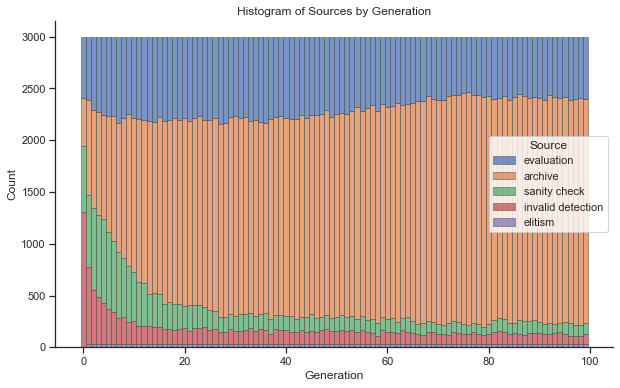

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Ensure 'Generation' is categorical for proper ordering on x-axis
df['Generation'] = df['Generation'].astype('category')

f, ax = plt.subplots(figsize=(10, 6))
sns.despine(f)

# Plot histogram with stacked bars
sns.histplot(
    data=df,
    #data=df[df['Source'] == 'elitism'],
    x="Generation",
    hue='Source',
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
)

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Count')
plt.title('Histogram of Sources by Generation')

# Show the plot
plt.show()


In [17]:
df_full_eval = pd.read_csv('C:\\Users\\lamec\\WORK\\evolutionary_optimization_dumps\\dumps\\dataframe3.csv')
df_full_eval = df_full_eval[df_full_eval['Full Duration'] != 0.0]
df_full_eval['Fitness'] *= -1
df_full_eval['Full Fitness'] *= -1
df_full_eval.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Experiment name,Run number,Individual number,Generation,Phenotype,Smart Phenotype,Fitness,source,duration,Full Duration,Full Fitness,Difference,Accumulated Difference,Duration Difference,Fitness Difference
0,0,0,0,evolutionary_optimization,run_6,1004,52,"alpha_func, beta_func, sigma_func, grad_func =...","multiply(add(grad, add(square(constant(1.24647...",0.805855,elitism,23.472121,23.472121,0.805855,0.000000,0.000000,0.0,0.000000
1,1,1,1,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(grad, grad)",0.129109,archive,0.000000,6.357260,0.105509,0.023600,0.023600,0.0,0.023600
2,2,2,2,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(grad, grad)",0.129109,archive,0.000000,5.270779,0.100000,0.029109,0.052709,0.0,0.029109
3,3,3,3,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(grad, grad)",0.129109,archive,0.000000,4.802348,0.048745,0.080364,0.133073,0.0,0.080364
4,4,4,4,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(grad, grad)",0.129109,archive,0.000000,4.757688,0.135891,0.006782,0.139855,0.0,0.006782


In [18]:
df[df['Source'] != 'evaluation'].head(5)

,Experiment name,Run number,Individual number,Generation,Phenotype,Smart Phenotype,Fitness,Duration,Source
7,evolutionary_optimization,run_1,34,0,"alpha_func, beta_func, sigma_func, grad_func =...",grad,0.1,0.0,archive
8,evolutionary_optimization,run_1,36,0,"alpha_func, beta_func, sigma_func, grad_func =...",grad,0.1,0.0,archive
9,evolutionary_optimization,run_1,38,0,"alpha_func, beta_func, sigma_func, grad_func =...",grad,0.1,0.0,archive
13,evolutionary_optimization,run_1,57,0,"alpha_func, beta_func, sigma_func, grad_func =...",grad,0.1,0.0,archive
14,evolutionary_optimization,run_1,72,0,"alpha_func, beta_func, sigma_func, grad_func =...",grad,0.1,0.0,archive


In [19]:
""" 
for index, row in df_full_eval.iterrows():
		foo = row['Phenotype']
		filtered_df = df.loc[(df['Phenotype'] == foo), :]
		if len(filtered_df) != 0:
			#print(f"Updating {df_full_eval.loc[index, 'duration']} to {filtered_df.iloc[0]['Duration']}")
			df_full_eval.loc[index, 'duration'] = filtered_df.iloc[0]['Duration']
		else:
			print("BIG ERROR")
		if index % 100 == 0:
			print(index)

"""


	

' \nfor index, row in df_full_eval.iterrows():\n\t\tfoo = row[\'Phenotype\']\n\t\tfiltered_df = df.loc[(df[\'Phenotype\'] == foo), :]\n\t\tif len(filtered_df) != 0:\n\t\t\t#print(f"Updating {df_full_eval.loc[index, \'duration\']} to {filtered_df.iloc[0][\'Duration\']}")\n\t\t\tdf_full_eval.loc[index, \'duration\'] = filtered_df.iloc[0][\'Duration\']\n\t\telse:\n\t\t\tprint("BIG ERROR")\n\t\tif index % 100 == 0:\n\t\t\tprint(index)\n\n'

In [20]:
df_full_eval.to_csv('C:\\Users\\lamec\\WORK\\evolutionary_optimization_dumps\\dumps\\dataframe3.csv')

<Figure size 720x432 with 0 Axes>

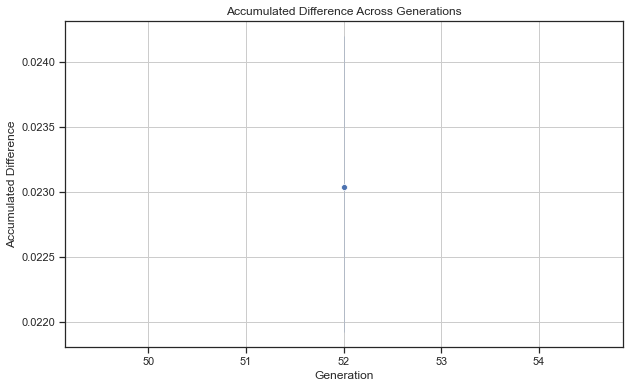

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Experiment name,Run number,Individual number,Generation,Phenotype,Smart Phenotype,Fitness,source,duration,Full Duration,Full Fitness,Difference,Accumulated Difference,Duration Difference,Fitness Difference,Mean Difference
0,0,0,0,evolutionary_optimization,run_6,1004,52,"alpha_func, beta_func, sigma_func, grad_func =...","multiply(add(grad, add(square(constant(1.24647...",0.805855,elitism,23.472121,23.472121,0.805855,0.000000,0.000000,0.0,0.000000,0.045962
1,1,1,1,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(grad, grad)",0.129109,archive,0.000000,6.357260,0.105509,0.023600,0.023600,0.0,0.023600,0.034913
2,2,2,2,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(grad, grad)",0.129109,archive,0.000000,5.270779,0.100000,0.029109,0.052709,0.0,0.029109,0.026093
3,3,3,3,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(grad, grad)",0.129109,archive,0.000000,4.802348,0.048745,0.080364,0.133073,0.0,0.080364,0.022792
4,4,4,4,evolutionary_optimization,run_6,189,52,"alpha_func, beta_func, sigma_func, grad_func =...","subtract(grad, grad)",0.129109,archive,0.000000,4.757688,0.135891,0.006782,0.139855,0.0,0.006782,0.018671


In [21]:
df_full_eval['Generation'] = pd.to_numeric(df_full_eval['Generation'])
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Step 1: Calculate the difference
df_full_eval['Fitness Difference'] = abs(df_full_eval['Full Fitness'] - df_full_eval['Fitness'])

# Step 2: Accumulate the difference across generations
# This assumes 'Generation' is ordered correctly for accumulation
df_full_eval['Mean Difference'] = df_full_eval.groupby('Generation')['Fitness Difference'].mean()

# Step 3: Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_full_eval, x='Generation', y='Mean Difference', marker='o')
plt.title('Accumulated Difference Across Generations')
plt.xlabel('Generation')
plt.ylabel('Accumulated Difference')
plt.grid(True)
plt.show()
df_full_eval.head(5)

In [40]:
df_full_eval["Duration Difference"] = df_full_eval['Full Duration'] - df_full_eval['duration']
df_full_eval["Duration Difference"]
df_full_eval.groupby(['Generation']).sum()
duration_difference_cumsum = df_full_eval.groupby(['Generation']).sum()

def cumsum(duration_difference_cumsum):
    x = df_full_eval.groupby(['Generation']).sum()
    def cumsum_instance(row):
        print("########################################################################################################################################################################################")
        print(f"{row.name}, {row}")
        row['Duration Difference'] = sum(x.iloc[np.arange(0,row.name + 1)]['Duration Difference'])
        return row
    return cumsum_instance
f = cumsum(duration_difference_cumsum)
print(duration_difference_cumsum['Duration Difference'])
duration_difference_cumsum = duration_difference_cumsum.apply(f, axis=1)
duration_difference_cumsum

Generation
0      8139.207359
1      7727.008919
2      7188.609638
3      7454.298736
4      7298.152387
          ...     
95    15487.475085
96    13822.240614
97    14755.376583
98    14443.227411
99    15300.918669
Name: Duration Difference, Length: 100, dtype: float64
########################################################################################################################################################################################
0, Unnamed: 0                3.043457e+08
Unnamed: 0.1              3.078562e+08
Unnamed: 0.1.1            3.078562e+08
Individual number         1.211760e+05
Fitness                   1.327559e+02
duration                  5.574396e+03
Full Duration             1.371360e+04
Full Fitness              2.452769e+02
Difference                8.139207e+03
Accumulated Difference    1.044141e+07
Duration Difference       8.139207e+03
Fitness Difference        1.126076e+02
Mean Difference           0.000000e+00
Name: 0, dtype: float64
######

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Individual number,Fitness,duration,Full Duration,Full Fitness,Difference,Accumulated Difference,Duration Difference,Fitness Difference,Mean Difference
Generation,,,,,,,,,,,,,
0,304345748.0,307856212.0,307856212.0,121176.0,132.755892,5574.395787,13713.603146,245.276949,8139.207359,1.044141e+07,8.139207e+03,112.607638,0.0
1,300563904.0,303926092.0,303926092.0,258264.0,163.112092,6056.223776,13783.232696,248.082839,7727.008919,9.802689e+06,1.586622e+04,85.398238,0.0
2,309123752.0,312946748.0,312946748.0,386095.0,187.632729,6951.569596,14140.179234,251.387712,7188.609638,9.348456e+06,2.305483e+04,64.372656,0.0
3,315028275.0,318500225.0,318500225.0,510470.0,203.417274,7118.173038,14572.471774,260.625603,7454.298736,9.995019e+06,3.050912e+04,57.754220,0.0
4,312348433.0,315906427.0,315906427.0,636680.0,217.289893,7445.029960,14743.182347,264.464385,7298.152387,9.782442e+06,3.780728e+04,47.537402,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,319227952.0,324635781.0,324635781.0,6773634.0,788.472362,7514.227914,23001.702998,764.575001,15487.475085,2.074551e+07,1.208332e+06,74.601216,0.0
96,313893991.0,319970297.0,319970297.0,6566020.0,724.521145,7866.648164,21688.888777,696.470728,13822.240614,1.868565e+07,1.222154e+06,73.030817,0.0
97,316287408.0,322332582.0,322332582.0,6538427.0,737.279490,7333.578102,22088.954685,708.976274,14755.376583,1.960015e+07,1.236909e+06,70.502671,0.0


<Figure size 720x432 with 0 Axes>

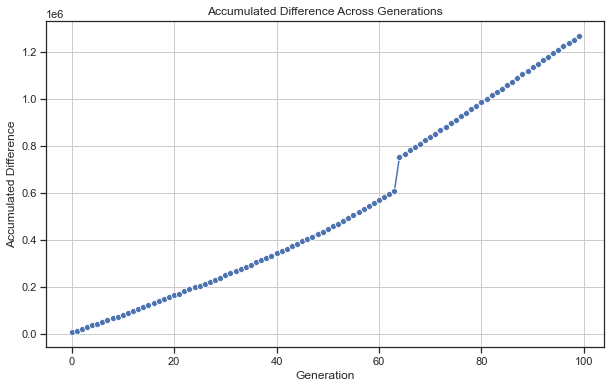

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Individual number,Generation,Fitness,duration,Full Duration,Full Fitness,Difference,Accumulated Difference,Duration Difference,Fitness Difference,Mean Difference
count,255156.00000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,2.551560e+05,255156.000000,255156.000000,100.000000
mean,127577.50000,129804.670394,129804.670394,1457.285433,49.331009,0.198127,2.819880,7.784111,0.197950,4.964231,6.324902e+03,4.964231,0.022981,0.023041
std,73657.33698,77652.871716,77652.871716,1435.935922,28.751190,0.242147,5.406384,248.884434,0.237485,248.880338,7.493739e+03,248.880338,0.045696,0.006079
min,0.00000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,4.241654,0.003836,-4.085634,-1.776357e-15,-4.085634,0.000000,0.010985
25%,63788.75000,63788.750000,63788.750000,238.000000,24.000000,0.100000,0.000000,4.698610,0.100000,0.000000,2.619086e+03,0.000000,0.000000,0.019281
50%,127577.50000,127577.500000,127577.500000,1145.000000,49.000000,0.100000,0.000000,5.212921,0.100000,4.624486,5.608220e+03,4.624486,0.000000,0.023510
75%,191366.25000,191366.250000,191366.250000,2084.000000,74.000000,0.129109,6.894738,7.216784,0.113255,4.902993,8.767138e+03,4.902993,0.026109,0.027985
max,255155.00000,299994.000000,299994.000000,8085.000000,99.000000,0.845400,204.725095,125491.290496,0.850491,125491.290496,1.467472e+05,125491.290496,0.828400,0.045962


In [41]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Step 3: Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=duration_difference_cumsum.index, y=duration_difference_cumsum['Duration Difference'], marker='o')
plt.title('Accumulated Difference Across Generations')
plt.xlabel('Generation')
plt.ylabel('Accumulated Difference')
plt.grid(True)
plt.show()
df_full_eval.describe()

In [48]:
df_full_eval["Fitness Difference"] = df_full_eval['Full Fitness'] - df_full_eval['Fitness']
for source in df_full_eval['source'].unique:
df_full_eval.groupby(['Generation']).sum()
fitness_difference_cumsum = df_full_eval.groupby(['Generation']).sum()

def cumsum(fitness_difference_cumsum):
    x = df_full_eval.groupby(['Generation']).sum()
    def cumsum_instance(row):
        print("########################################################################################################################################################################################")
        print(f"{row.name}, {row}")
        row['Fitness Difference'] = np.mean(abs(x.iloc[np.arange(0,row.name + 1)]['Fitness Difference']))
        row
        return row
    return cumsum_instance
f = cumsum(fitness_difference_cumsum)
print(fitness_difference_cumsum['Fitness Difference'])
fitness_difference_cumsum = fitness_difference_cumsum.apply(f, axis=1)
fitness_difference_cumsum

Generation
0     112.521057
1      84.970747
2      63.754983
3      57.208329
4      47.174492
         ...    
95    -23.897361
96    -28.050416
97    -28.303216
98    -34.783853
99    -29.647743
Name: Fitness Difference, Length: 100, dtype: float64
########################################################################################################################################################################################
0, Unnamed: 0                3.043457e+08
Unnamed: 0.1              3.078562e+08
Unnamed: 0.1.1            3.078562e+08
Individual number         1.211760e+05
Fitness                   1.327559e+02
duration                  5.574396e+03
Full Duration             1.371360e+04
Full Fitness              2.452769e+02
Difference                8.139207e+03
Accumulated Difference    1.044141e+07
Duration Difference       8.139207e+03
Fitness Difference        1.125211e+02
Mean Difference           0.000000e+00
Name: 0, dtype: float64
#############################

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Individual number,Fitness,duration,Full Duration,Full Fitness,Difference,Accumulated Difference,Duration Difference,Fitness Difference,Mean Difference
Generation,,,,,,,,,,,,,
0,304345748.0,307856212.0,307856212.0,121176.0,132.755892,5574.395787,13713.603146,245.276949,8139.207359,1.044141e+07,8139.207359,112.521057,0.0
1,300563904.0,303926092.0,303926092.0,258264.0,163.112092,6056.223776,13783.232696,248.082839,7727.008919,9.802689e+06,7727.008919,98.745902,0.0
2,309123752.0,312946748.0,312946748.0,386095.0,187.632729,6951.569596,14140.179234,251.387712,7188.609638,9.348456e+06,7188.609638,87.082262,0.0
3,315028275.0,318500225.0,318500225.0,510470.0,203.417274,7118.173038,14572.471774,260.625603,7454.298736,9.995019e+06,7454.298736,79.613779,0.0
4,312348433.0,315906427.0,315906427.0,636680.0,217.289893,7445.029960,14743.182347,264.464385,7298.152387,9.782442e+06,7298.152387,73.125922,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,319227952.0,324635781.0,324635781.0,6773634.0,788.472362,7514.227914,23001.702998,764.575001,15487.475085,2.074551e+07,15487.475085,18.447693,0.0
96,313893991.0,319970297.0,319970297.0,6566020.0,724.521145,7866.648164,21688.888777,696.470728,13822.240614,1.868565e+07,13822.240614,18.546690,0.0
97,316287408.0,322332582.0,322332582.0,6538427.0,737.279490,7333.578102,22088.954685,708.976274,14755.376583,1.960015e+07,14755.376583,18.646247,0.0


<Figure size 720x432 with 0 Axes>

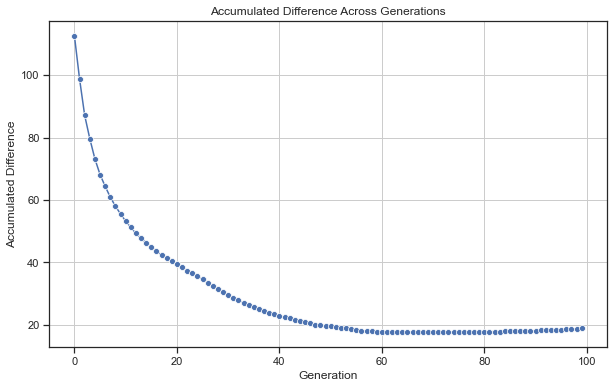

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Individual number,Generation,Fitness,duration,Full Duration,Full Fitness,Difference,Accumulated Difference,Duration Difference,Fitness Difference,Mean Difference
count,255156.00000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,255156.000000,2.551560e+05,255156.000000,255156.000000,100.000000
mean,127577.50000,129804.670394,129804.670394,1457.285433,49.331009,0.198127,2.819880,7.784111,0.197950,4.964231,6.324902e+03,4.964231,-0.000177,0.023041
std,73657.33698,77652.871716,77652.871716,1435.935922,28.751190,0.242147,5.406384,248.884434,0.237485,248.880338,7.493739e+03,248.880338,0.051149,0.006079
min,0.00000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,4.241654,0.003836,-4.085634,-1.776357e-15,-4.085634,-0.735836,0.010985
25%,63788.75000,63788.750000,63788.750000,238.000000,24.000000,0.100000,0.000000,4.698610,0.100000,0.000000,2.619086e+03,0.000000,0.000000,0.019281
50%,127577.50000,127577.500000,127577.500000,1145.000000,49.000000,0.100000,0.000000,5.212921,0.100000,4.624486,5.608220e+03,4.624486,0.000000,0.023510
75%,191366.25000,191366.250000,191366.250000,2084.000000,74.000000,0.129109,6.894738,7.216784,0.113255,4.902993,8.767138e+03,4.902993,0.000000,0.027985
max,255155.00000,299994.000000,299994.000000,8085.000000,99.000000,0.845400,204.725095,125491.290496,0.850491,125491.290496,1.467472e+05,125491.290496,0.828400,0.045962


In [49]:
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Step 3: Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=fitness_difference_cumsum.index, y=fitness_difference_cumsum['Fitness Difference'], marker='o')
plt.title('Accumulated Difference Across Generations')
plt.xlabel('Generation')
plt.ylabel('Accumulated Difference')
plt.grid(True)
plt.show()
df_full_eval.describe()